# Week 12: In-Class Assignment: <br> Forecasting with LSTMs

### <p style="text-align: right;"> &#9989; Kyle Taft

![capture](https://www.dw.com/image/16131285_105.jpg)


### Goal of this assignment
Today, you will explore TSA, specifically forecasting, using the Keeling curve (atmospheric CO$_2$ concentrations versus time). You will also get more practice with TensorFlow. 

Recall, however, that `sklearn` helper libraries (e.g., [`preprocessing`](https://scikit-learn.org/stable/modules/preprocessing.html), [`metrics`](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)) are still just as helpful, and we will continue to use `sklearn` alongside `keras`. 

This assignment is due today at **11:59PM Today**

# Part 1. The Keeling Curve

One of the most important problems that will impact your generation is the accumulation of carbon dioxide in the atmosphere. Luckily, we have good data since 1958: CO$_2$ measurements have been made at the Mauna Loa Observatory in Hawaii and the resulting curve is called the [Keeling Curve](https://en.wikipedia.org/wiki/Keeling_Curve). With his work referred to as one of the most important scientific works, [Keeling](https://en.wikipedia.org/wiki/Charles_David_Keeling) received the National Medal of Science. Arguably, predicting the _future_ of this curve (forecasting) is one of the next most important tasks facing humanity, so let's get to it! 

Hopefully ML will help save us! 

Examine the code in the next few cells, but don't worry too much about it. To save time I pasted the data directly into the next cell - no need for you to worry about the file, fixing/cleaning data, dealing date-time format or transferring data between Numpy and Pandas dataframes. I also separated it into a train-test split. (You're very welcome!) 

Also, recall that because this is time series data, we cannot use random test-train splits. We have to think about what we arre doing a little more carefully. 

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')


In [2]:

early_times = np.array([0.        ,  0.08487512,  0.16701233,  0.33402465,  
                        0.41889977, 0.50377489,  0.67078722,  0.75292443,  0.83779954,  0.92267466,
        0.99933606,  1.08421117,  1.16634838,  1.2512235 ,  1.33336071,
        1.41823583,  1.50311095,  1.58524816,  1.67012327,  1.75226048,
        1.8371356 ,  1.92201072,  2.00141002,  2.08628514,  2.16842235,
        2.25329747,  2.33543468,  2.42030979,  2.50518491,  2.58732212,
        2.67219724,  2.75433445,  2.83920957,  2.92408468,  3.00074608,
        3.0856212 ,  3.16775841,  3.25263352,  3.33477073,  3.41964585,
        3.50452097,  3.58665818,  3.6715333 ,  3.75367051,  3.83854562,
        3.92342074,  4.00008214,  4.08495725,  4.16709446,  4.25196958,
        4.33410679,  4.41898191,  4.50385703,  4.58599424,  4.67086935,
        4.75300656,  4.83788168,  4.9227568 ,  4.99941819,  5.08429331,
        5.16643052,  5.25130564,  5.33344285,  5.41831797,  5.50319308,
        5.58533029,  5.67020541,  5.75234262,  5.83721774,  6.16850449,
        6.2533796 ,  6.33551681,  6.42039193,  6.50526705,  6.58740426,
        6.67227938,  6.75441659,  6.8392917 ,  6.92416682,  7.00082822,
        7.08570333,  7.16784054,  7.25271566,  7.33485287,  7.41972799,
        7.50460311,  7.58674032,  7.67161543,  7.75375264,  7.83862776,
        7.92350288,  8.00016427,  8.08503939,  8.1671766 ,  8.25205172,
        8.33418893,  8.41906405,  8.50393916,  8.58607637,  8.67095149,
        8.7530887 ,  8.83796382,  8.92283894,  8.99950033,  9.08437545,
        9.16651266,  9.25138778,  9.33352499,  9.4184001 ,  9.50327522,
        9.58541243,  9.67028755,  9.75242476,  9.83729988,  9.92217499,
       10.0015743 , 10.08644941, 10.16858662, 10.25346174, 10.33559895,
       10.42047407, 10.50534919, 10.5874864 , 10.67236151, 10.75449872,
       10.83937384, 10.92424896, 11.00091035, 11.08578547, 11.16792268,
       11.2527978 , 11.33493501, 11.41981013, 11.50468524, 11.58682245,
       11.67169757, 11.75383478, 11.8387099 , 11.92358502, 12.00024641,
       12.08512153, 12.16725874, 12.25213386, 12.33427107, 12.41914618,
       12.5040213 , 12.58615851, 12.67103363, 12.75317084, 12.83804596,
       12.92292107, 12.99958247, 13.08445759, 13.1665948 , 13.25146991,
       13.33360712, 13.41848224, 13.50335736, 13.58549457, 13.67036969,
       13.7525069 , 13.83738201, 13.92225713, 14.00165643, 14.08653155,
       14.16866876, 14.25354388, 14.33568109, 14.42055621, 14.50543132,
       14.58756853, 14.67244365, 14.75458086, 14.83945598, 14.9243311 ,
       15.00099249, 15.08586761, 15.16800482, 15.25287994, 15.33501715,
       15.41989226, 15.50476738, 15.58690459, 15.67177971, 15.75391692,
       15.83879204, 15.92366715, 16.00032855, 16.08520367, 16.16734088,
       16.25221599, 16.3343532 , 16.41922832, 16.50410344, 16.58624065,
       16.67111577, 16.75325298, 16.83812809, 16.92300321, 16.99966461,
       17.08453972, 17.16667693, 17.25155205, 17.33368926, 17.41856438,
       17.5034395 , 17.58557671, 17.67045182, 17.75258903, 17.83746415,
       17.92233927, 18.00173857, 18.08661369, 18.1687509 , 18.25362602,
       18.33576323, 18.42063834, 18.50551346, 18.58765067, 18.67252579,
       18.754663  , 18.83953812, 18.92441323, 19.00107463, 19.08594975,
       19.16808696, 19.25296207, 19.33509928, 19.4199744 , 19.50484952,
       19.58698673, 19.67186185, 19.75399906, 19.83887417, 19.92374929,
       20.00041069, 20.0852858 , 20.16742301, 20.25229813, 20.33443534,
       20.41931046, 20.50418558, 20.58632279, 20.6711979 , 20.75333511,
       20.83821023, 20.92308535, 20.99974674, 21.08462186, 21.16675907,
       21.25163419, 21.3337714 , 21.41864652, 21.50352163, 21.58565884,
       21.67053396, 21.75267117, 21.83754629, 21.9224214 , 22.00182071,
       22.08669583, 22.16883304, 22.25370815, 22.33584536, 22.42072048,
       22.5055956 , 22.58773281, 22.67260792, 22.75474514, 22.83962025,
       22.92449537, 23.00115677, 23.08603188, 23.16816909, 23.25304421,
       23.33518142, 23.42005654, 23.50493165, 23.58706887, 23.67194398,
       23.75408119, 23.83895631, 23.92383143, 24.00049282, 24.08536794,
       24.16750515, 24.25238027, 24.33451748, 24.4193926 , 24.50426771,
       24.58640492, 24.67128004, 24.75341725, 24.83829237, 24.92316748,
       24.99982888, 25.084704  , 25.16684121, 25.25171633, 25.33385354,
       25.41872865, 25.50360377, 25.58574098, 25.6706161 , 25.75275331,
       25.83762842, 25.92250354, 26.00190285, 26.08677796, 26.16891517,
       26.25379029, 26.3359275 , 26.42080262, 26.50567773, 26.58781494,
       26.67269006, 26.75482727, 26.83970239, 26.92457751, 27.0012389 ,
       27.08611402, 27.16825123, 27.25312635, 27.33526356, 27.42013867,
       27.50501379, 27.587151  , 27.67202612, 27.75416333, 27.83903845,
       27.92391356, 28.00057496, 28.08545008, 28.16758729, 28.25246241,
       28.33459962, 28.41947473, 28.50434985, 28.58648706, 28.67136218,
       28.75349939, 28.8383745 , 28.92324962, 28.99991102, 29.08478614,
       29.16692335, 29.25179846, 29.33393567, 29.41881079, 29.50368591,
       29.58582312, 29.67069823, 29.75283544, 29.83771056, 29.92258568,
       30.00198498, 30.0868601 , 30.16899731, 30.25387243, 30.33600964,
       30.42088475, 30.50575987, 30.58789708, 30.6727722 , 30.75490941,
       30.83978453, 30.92465964, 31.00132104, 31.08619616, 31.16833337,
       31.25320848, 31.33534569, 31.42022081, 31.50509593, 31.58723314,
       31.67210826, 31.75424547, 31.83912058, 31.9239957 , 32.0006571 ,
       32.08553221, 32.16766943, 32.25254454, 32.33468175, 32.41955687,
       32.50443199, 32.5865692 , 32.67144431, 32.75358152, 32.83845664,
       32.92333176, 32.99999316, 33.08486827, 33.16700548, 33.2518806 ,
       33.33401781, 33.41889293, 33.50376804, 33.58590525, 33.67078037,
       33.75291758, 33.8377927 , 33.92266782, 34.00206712, 34.08694224,
       34.16907945, 34.25395456, 34.33609177, 34.42096689, 34.50584201,
       34.58797922, 34.67285434, 34.75499155, 34.83986666, 34.92474178,
       35.00140318, 35.08627829, 35.1684155 , 35.25329062, 35.33542783,
       35.42030295, 35.50517807, 35.58731528, 35.67219039, 35.7543276 ,
       35.83920272, 35.92407784, 36.00073923, 36.08561435, 36.16775156,
       36.25262668, 36.33476389, 36.41963901, 36.50451412, 36.58665133,
       36.67152645, 36.75366366, 36.83853878, 36.9234139 , 37.00007529,
       37.08495041, 37.16708762, 37.25196274, 37.33409995, 37.41897506,
       37.50385018, 37.58598739, 37.67086251, 37.75299972, 37.83787484,
       37.92274995, 38.00214926, 38.08702437, 38.16916158, 38.2540367 ,
       38.33617391, 38.42104903, 38.50592415, 38.58806136, 38.67293647,
       38.75507368, 38.8399488 , 38.92482392, 39.00148531, 39.08636043,
       39.16849764, 39.25337276, 39.33550997, 39.42038509, 39.5052602 ,
       39.58739741, 39.67227253, 39.75440974, 39.83928486, 39.92415998,
       40.00082137, 40.08569649, 40.1678337 , 40.25270882, 40.33484603,
       40.41972114, 40.50459626, 40.58673347, 40.67160859, 40.7537458 ,
       40.83862092, 40.92349603, 41.00015743, 41.08503255, 41.16716976,
       41.25204487, 41.33418208, 41.4190572 , 41.50393232, 41.58606953,
       41.67094465, 41.75308186, 41.83795697, 41.92283209, 42.00223139,
       42.08710651, 42.16924372, 42.25411884, 42.33625605, 42.42113117,
       42.50600628, 42.58814349, 42.67301861, 42.75515582, 42.84003094,
       42.92490606, 43.00156745, 43.08644257, 43.16857978, 43.2534549 ,
       43.33559211, 43.42046722, 43.50534234, 43.58747955, 43.67235467,
       43.75449188, 43.839367  , 43.92424211, 44.00090351, 44.08577863,
       44.16791584, 44.25279095, 44.33492816, 44.41980328, 44.5046784 ,
       44.58681561, 44.67169073, 44.75382794, 44.83870305, 44.92357817,
       45.00023957, 45.08511468, 45.16725189, 45.25212701, 45.33426422,
       45.41913934, 45.50401446, 45.58615167, 45.67102678, 45.75316399])

early_co2 = np.array([315.69, 317.46, 317.5 , 315.86, 314.93, 313.21, 313.33, 314.67,
       315.58, 316.48, 316.65, 317.72, 318.29, 318.15, 316.54, 314.8 ,
       313.84, 313.34, 314.81, 315.58, 316.43, 316.98, 317.58, 319.03,
       320.04, 319.59, 318.18, 315.9 , 314.17, 313.83, 315.  , 316.19,
       316.9 , 317.7 , 318.54, 319.48, 320.58, 319.77, 318.57, 316.79,
       314.99, 315.31, 316.1 , 317.01, 317.94, 318.55, 319.68, 320.57,
       321.02, 320.62, 319.61, 317.4 , 316.25, 315.42, 316.69, 317.7 ,
       318.74, 319.07, 319.86, 321.39, 322.25, 321.48, 319.74, 317.77,
       316.21, 315.99, 317.06, 318.35, 319.57, 322.26, 321.89, 320.44,
       318.69, 316.7 , 316.87, 317.68, 318.71, 319.44, 320.44, 320.89,
       322.14, 322.17, 321.87, 321.21, 318.87, 317.82, 317.3 , 318.87,
       319.42, 320.62, 321.59, 322.39, 323.7 , 324.08, 323.75, 322.39,
       320.36, 318.64, 318.1 , 319.79, 321.03, 322.33, 322.5 , 323.04,
       324.42, 325.  , 324.09, 322.55, 320.92, 319.25, 319.39, 320.72,
       321.96, 322.57, 323.14, 323.89, 325.02, 325.57, 325.36, 324.14,
       322.11, 320.33, 320.25, 321.32, 322.89, 324.  , 324.42, 325.63,
       326.66, 327.38, 326.7 , 325.88, 323.66, 322.38, 321.78, 322.85,
       324.12, 325.06, 325.98, 326.93, 328.14, 328.08, 327.67, 326.34,
       324.69, 323.1 , 323.07, 324.01, 325.13, 326.17, 326.68, 327.17,
       327.79, 328.92, 328.57, 327.36, 325.43, 323.36, 323.56, 324.8 ,
       326.01, 326.77, 327.63, 327.75, 329.73, 330.07, 329.09, 328.04,
       326.32, 324.84, 325.2 , 326.5 , 327.55, 328.55, 329.56, 330.3 ,
       331.5 , 332.48, 332.07, 330.87, 329.31, 327.51, 327.18, 328.16,
       328.64, 329.35, 330.71, 331.48, 332.65, 333.09, 332.25, 331.18,
       329.39, 327.43, 327.37, 328.46, 329.57, 330.4 , 331.4 , 332.04,
       333.31, 333.97, 333.6 , 331.9 , 330.06, 328.56, 328.34, 329.49,
       330.76, 331.75, 332.56, 333.5 , 334.58, 334.88, 334.33, 333.05,
       330.94, 329.3 , 328.94, 330.31, 331.68, 332.93, 333.42, 334.7 ,
       336.07, 336.75, 336.27, 334.92, 332.75, 331.59, 331.16, 332.4 ,
       333.85, 334.97, 335.38, 336.64, 337.76, 338.01, 337.89, 336.54,
       334.68, 332.76, 332.55, 333.92, 334.95, 336.23, 336.76, 337.96,
       338.88, 339.47, 339.29, 337.73, 336.09, 333.92, 333.86, 335.29,
       336.73, 338.01, 338.36, 340.07, 340.77, 341.47, 341.17, 339.56,
       337.6 , 335.88, 336.02, 337.1 , 338.21, 339.24, 340.48, 341.38,
       342.51, 342.91, 342.25, 340.49, 338.43, 336.69, 336.86, 338.36,
       339.61, 340.75, 341.61, 342.7 , 343.57, 344.14, 343.35, 342.06,
       339.81, 337.98, 337.86, 339.26, 340.49, 341.38, 342.52, 343.1 ,
       344.94, 345.76, 345.32, 343.98, 342.38, 339.87, 339.99, 341.15,
       342.99, 343.7 , 344.5 , 345.28, 347.06, 347.43, 346.8 , 345.39,
       343.28, 341.07, 341.35, 342.98, 344.22, 344.97, 345.99, 347.42,
       348.35, 348.93, 348.25, 346.56, 344.68, 343.09, 342.8 , 344.24,
       345.56, 346.3 , 346.95, 347.85, 349.55, 350.21, 349.55, 347.94,
       345.9 , 344.85, 344.17, 345.66, 346.9 , 348.02, 348.48, 349.41,
       350.99, 351.85, 351.26, 349.51, 348.1 , 346.45, 346.36, 347.81,
       348.96, 350.43, 351.73, 352.22, 353.59, 354.22, 353.79, 352.38,
       350.43, 348.73, 348.88, 350.07, 351.34, 352.76, 353.07, 353.68,
       355.42, 355.67, 355.12, 353.9 , 351.67, 349.8 , 349.99, 351.29,
       352.52, 353.66, 354.7 , 355.38, 356.2 , 357.16, 356.23, 354.81,
       352.91, 350.96, 351.18, 352.83, 354.21, 354.72, 355.75, 357.16,
       358.6 , 359.34, 358.24, 356.17, 354.02, 352.15, 352.21, 353.75,
       354.99, 355.99, 356.72, 357.81, 359.15, 359.66, 359.25, 357.02,
       355.  , 353.01, 353.31, 354.16, 355.4 , 356.7 , 357.16, 358.38,
       359.46, 360.28, 359.6 , 357.57, 355.52, 353.69, 353.99, 355.33,
       356.8 , 358.37, 358.91, 359.97, 361.26, 361.69, 360.94, 359.55,
       357.48, 355.84, 356.  , 357.58, 359.04, 359.97, 361.  , 361.64,
       363.45, 363.8 , 363.26, 361.89, 359.45, 358.05, 357.76, 359.56,
       360.7 , 362.05, 363.24, 364.02, 364.72, 365.41, 364.97, 363.65,
       361.48, 359.45, 359.61, 360.76, 362.33, 363.18, 363.99, 364.56,
       366.36, 366.8 , 365.63, 364.47, 362.5 , 360.19, 360.77, 362.43,
       364.28, 365.33, 366.15, 367.31, 368.61, 369.3 , 368.88, 367.64,
       365.78, 363.9 , 364.24, 365.46, 366.97, 368.15, 368.87, 369.59,
       371.14, 371.  , 370.35, 369.27, 366.93, 364.64, 365.13, 366.68,
       368.  , 369.14, 369.46, 370.51, 371.66, 371.83, 371.69, 370.12,
       368.12, 366.62, 366.73, 368.29, 369.53, 370.28, 371.5 , 372.12,
       372.86, 374.02, 373.31, 371.62, 369.55, 367.96, 368.1 , 369.68,
       371.24, 372.44, 373.08, 373.52, 374.86, 375.55, 375.4 , 374.02,
       371.49, 370.7 , 370.25, 372.08, 373.78, 374.68, 375.62, 376.11,
       377.65, 378.35, 378.13, 376.61, 374.48, 372.98, 373.  , 374.35,
       375.69])

late_times = np.array([45.75316399, 45.83803911, 45.92291423, 46.00231353, 46.08718865,
       46.16932586, 46.25420098, 46.33633819, 46.4212133 , 46.50608842,
       46.58822563, 46.67310075, 46.75523796, 46.84011308, 46.92498819,
       47.00164959, 47.08652471, 47.16866192, 47.25353703, 47.33567424,
       47.42054936, 47.50542448, 47.58756169, 47.67243681, 47.75457402,
       47.83944913, 47.92432425, 48.00098565, 48.08586076, 48.16799797,
       48.25287309, 48.3350103 , 48.41988542, 48.50476054, 48.58689775,
       48.67177286, 48.75391007, 48.83878519, 48.92366031, 49.0003217 ,
       49.08519682, 49.16733403, 49.25220915, 49.33434636, 49.41922148,
       49.50409659, 49.5862338 , 49.67110892, 49.75324613, 49.83812125,
       49.92299637, 50.00239567, 50.08727079, 50.169408  , 50.25428311,
       50.33642032, 50.42129544, 50.50617056, 50.58830777, 50.67318289,
       50.7553201 , 50.84019521, 50.92507033, 51.00173173, 51.08660684,
       51.16874405, 51.25361917, 51.33575638, 51.4206315 , 51.50550662,
       51.58764383, 51.67251894, 51.75465615, 51.83953127, 51.92440639,
       52.00106778, 52.0859429 , 52.16808011, 52.25295523, 52.33509244,
       52.41996756, 52.50484267, 52.58697988, 52.671855  , 52.75399221,
       52.83886733, 52.92374245, 53.00040384, 53.08527896, 53.16741617,
       53.25229129, 53.3344285 , 53.41930361, 53.50417873, 53.58631594,
       53.67119106, 53.75332827, 53.83820339, 53.9230785 , 54.00247781,
       54.08735292, 54.16949013, 54.25436525, 54.33650246, 54.42137758,
       54.5062527 , 54.58838991, 54.67326502, 54.75540223, 54.84027735,
       54.92515247, 55.00181386, 55.08668898, 55.16882619, 55.25370131,
       55.33583852, 55.42071364, 55.50558875, 55.58772596, 55.67260108,
       55.75473829, 55.83961341, 55.92448852, 56.00114992, 56.08602504,
       56.16816225, 56.25303737, 56.33517458, 56.42004969, 56.50492481,
       56.58706202, 56.67193714, 56.75407435, 56.83894947, 56.92382458,
       57.00048598, 57.0853611 , 57.16749831, 57.25237342, 57.33451063,
       57.41938575, 57.50426087, 57.58639808, 57.6712732 , 57.75341041,
       57.83828552, 57.92316064, 58.00255994, 58.08743506, 58.16957227,
       58.25444739, 58.3365846 , 58.42145972, 58.50633483, 58.58847204,
       58.67334716, 58.75548437, 58.84035949, 58.9252346 , 59.001896  ,
       59.08677112, 59.16890833, 59.25378345])

late_co2 = np.array([375.69, 376.79, 377.36, 378.39, 380.5 , 380.61, 379.55, 377.76,
       375.84, 374.05, 374.22, 375.84, 377.44, 378.34, 379.61, 380.17,
       382.05, 382.24, 382.08, 380.67, 378.67, 376.42, 376.8 , 378.31,
       379.96, 381.37, 382.02, 382.56, 384.37, 384.92, 384.03, 382.28,
       380.48, 378.81, 379.06, 380.14, 381.66, 382.58, 383.71, 384.34,
       386.23, 386.41, 385.87, 384.45, 381.84, 380.86, 380.86, 382.35,
       383.61, 385.07, 385.84, 385.83, 386.77, 388.51, 388.05, 386.25,
       384.08, 383.09, 382.78, 384.01, 385.11, 386.65, 387.12, 388.51,
       389.57, 390.16, 389.62, 388.07, 386.08, 384.65, 384.33, 386.05,
       387.49, 388.55, 390.07, 391.01, 392.38, 393.22, 392.24, 390.33,
       388.52, 386.84, 387.16, 388.67, 389.81, 391.3 , 391.92, 392.45,
       393.37, 394.28, 393.69, 392.6 , 390.21, 389.  , 388.93, 390.24,
       391.8 , 393.07, 393.35, 394.36, 396.43, 396.87, 395.88, 394.52,
       392.54, 391.13, 391.01, 392.95, 394.34, 395.61, 396.85, 397.26,
       398.35, 399.98, 398.87, 397.37, 395.41, 393.39, 393.7 , 395.19,
       396.82, 397.93, 398.1 , 399.47, 401.33, 401.88, 401.31, 399.07,
       397.21, 395.4 , 395.65, 397.22, 398.79, 399.85, 400.31, 401.51,
       403.45, 404.11, 402.88, 401.6 , 399.  , 397.5 , 398.28, 400.24,
       401.89, 402.65, 404.16, 404.86, 407.57, 407.65, 407.  , 404.5 ,
       402.24, 401.01, 401.5 , 403.64, 404.55, 406.07, 406.64, 407.06,
       408.95, 409.91, 409.12])

Let's take a peek at the CO$_2$ levels over time to see what we have to work with.

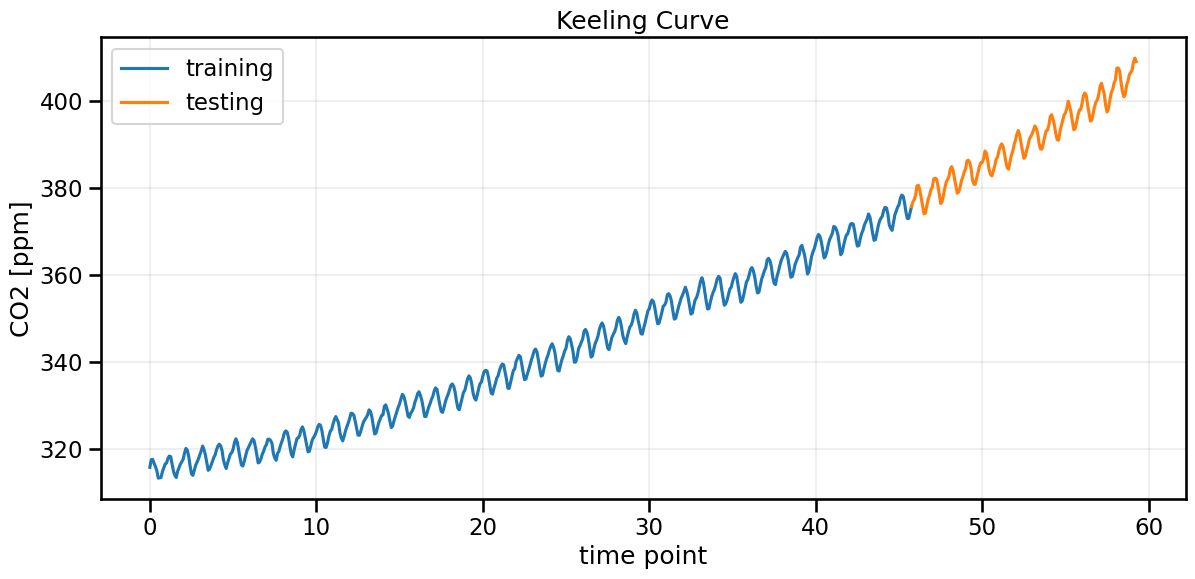

In [3]:
fig = plt.figure(figsize=(14,6))
plt.plot(early_times, early_co2, label='training')
plt.plot(late_times, late_co2, label='testing')
plt.legend()
plt.ylabel('CO2 [ppm]')
plt.xlabel('time point')
plt.title('Keeling Curve')
plt.grid(alpha=0.2)

Here is a reminder of the actual years over which this was measured.  While it is hard to pinpoint the exact date of the industrial revolution, it started around 1750 in England, and began to spread across the globe by around 1800; note that the levels are flat before that with a slight increase as industry became widespread. Before Keeling did his work, we relied on other measurement techniques; note the huge improvement in data quality due to Keeling. 

About 150 years after the start of the industrial revolution, around 1900, CO$_2$ concentrations really started increasing.

![keeling](https://robertscribbler.files.wordpress.com/2014/01/global-co2-levels-since-1700.png)


# Part 2: Detrending

The first step in TSA is detrending. If you are using a method like Autoregression (AR), this detrending step is crucial; however, for deep learning it may be less important and perhaps not needed. The general concensus is that -- if you can detrend -- just do it to allow the ML to "focus" on the harder aspects of the time series. 

In class there was a short discussion about detrending methods. I introduced LOESS/[Savitsky-Golay](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html), but note that you can detrend anyway you wish. Have a discussion within your group of how you want to do this. I'll show two ways and you can pick as many as you wish. 

A parametric approach (using a known functional form with parameters) will be examined first. Let's assume the data goes like 

$$A t^2 + Bt + C. $$

There are other choices, obviously, but this form nicely removes the trend  and gives us our first prediction for the rise of CO$_2$.  If you look at the figure below we can see that the CO$_2$ level is rising mostly linear, but with a definite quadratic component; there might be a slight cubic component, but we don't want to overfit, do we?! And, we also want to leave something for the ML to learn - if we missed something in the trend, we'll hopefully pick it up later with the ML. 

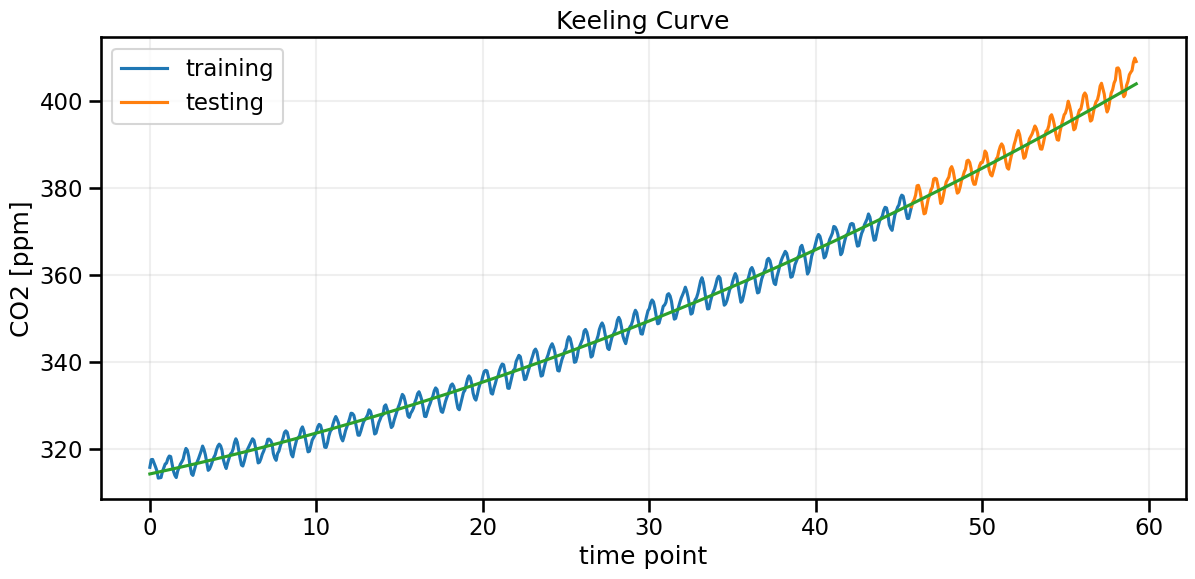

In [4]:
from scipy.optimize import curve_fit

def trend_season(t, a, b, c):

  return a*t**2 + b*t + c

popt, pcov = curve_fit(trend_season, early_times, early_co2, p0=[0.01, 0.8, 300])

all_times = np.hstack((early_times, late_times))
all_co2 = np.hstack((early_co2, late_co2))
fig = plt.figure(figsize=(14,6))
plt.plot(early_times, early_co2, label='training')
plt.plot(late_times, late_co2, label='testing')
plt.plot(all_times, trend_season(all_times, *popt))
plt.legend()
plt.ylabel('CO2 [ppm]')
plt.xlabel('time point')
plt.title('Keeling Curve')
plt.grid(alpha=0.2)

____

You will need to add the trend back in later, so pay attention to how this code grabs the parameters of the fit for plotting.

The trend alone gives a reasonable prediction, although there are no seasonal details. Let's examine that next. 
_____

This is what the stationary portion of the data looks like:


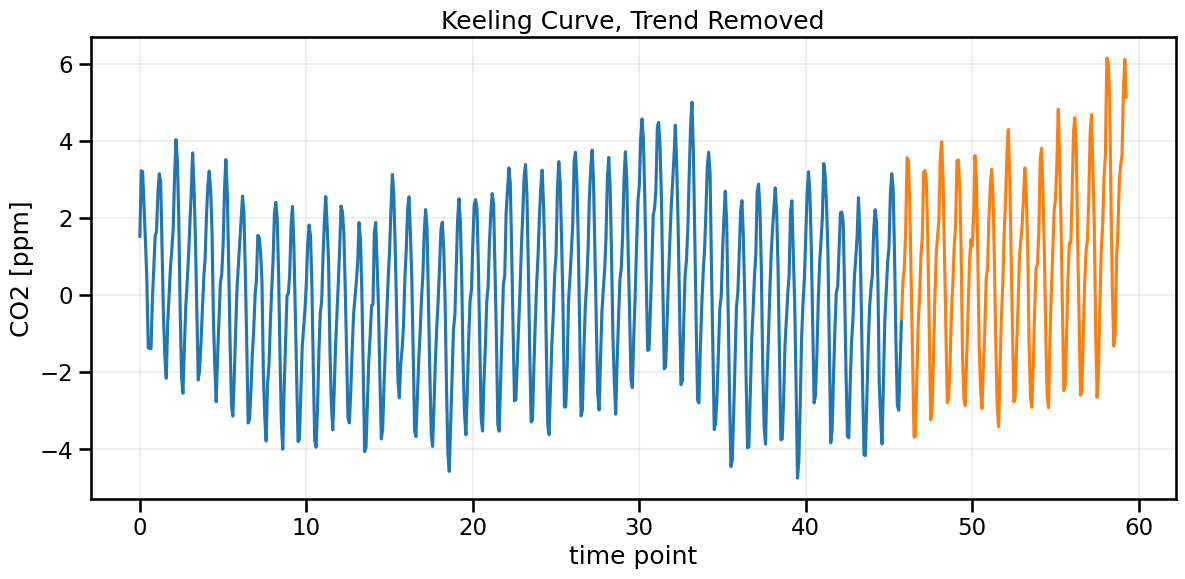

In [5]:
print("This is what the stationary portion of the data looks like:")

early_co2_stationary  = early_co2 - trend_season(early_times, *popt)
late_co2_stationary = late_co2 - trend_season(late_times, *popt)
all_co2_stationary = np.hstack((early_co2_stationary, late_co2_stationary))

fig = plt.figure(figsize=(14,6))

# plt.plot(all_times, all_co2_stationary, 'grey', linewidth=5)
plt.plot(early_times, early_co2_stationary)
plt.plot(late_times, late_co2_stationary)

plt.ylabel('CO2 [ppm]')
plt.xlabel('time point')
plt.title('Keeling Curve, Trend Removed')
plt.grid(alpha=0.2)

&#9989; **Task:** Discuss this result with your group. Pay attention to key details. 
* we have removed the trend, but do we get "pure" seasonality out? 
* what would happen if you used `curve_fit` to fit this to a sine wave?

1. **We do not get pure seasonality since we can see the residual is not a perfect sinusodial** 
2. **We might be able to extract seasonality but the variation might give us a worse results than we expect**

Let's compare this detrending method to the one we discussed in the lecture: LOESS (Savitsy-Golay). Now you are on your own - detrend the data with LOESS/SG and compare to what a polynomial did. Once you have plots, write a discussion of what you have concluded. 

Hints:
* [this](https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.STL.html) is what I showed in the lecture,
* [here](https://www.statsmodels.org/devel/examples/notebooks/generated/lowess.html) is a related method

Here is some code you can figure out and use. This makes fake data from a sine function. 

In [15]:
# import statsmodels.api as sm

# # Generate fake data from a cosine
# x = np.random.uniform(0, 4 * np.pi, size=200)
# y = np.sin(x) + np.random.random(size=len(x))

# # Compute a lowess smoothing of the data
# smoothed = sm.nonparametric.lowess(exog=x, endog=y, frac=0.2)

# plt.figure(figsize=(10,6))
# plt.plot(x, y, 'o', label = 'data')
# plt.plot(smoothed[:,0], smoothed[:,1], '+-', label='smoothed')
# # plt.plot(np.sort(x), np.sort(smoothed[:,0]))
# plt.legend()
# plt.grid(alpha = 0.2)

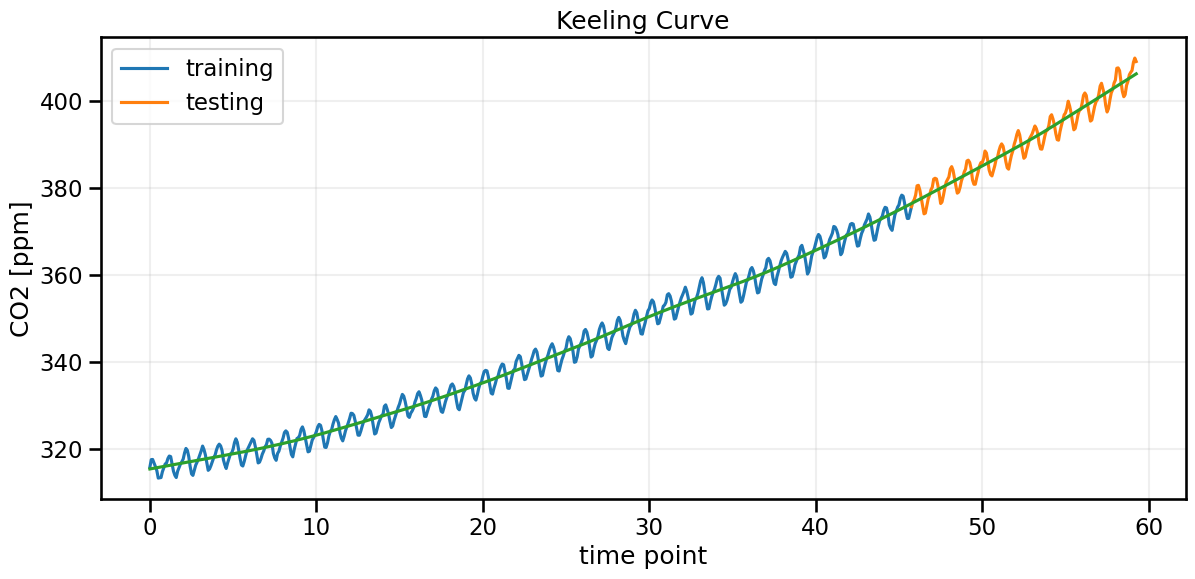

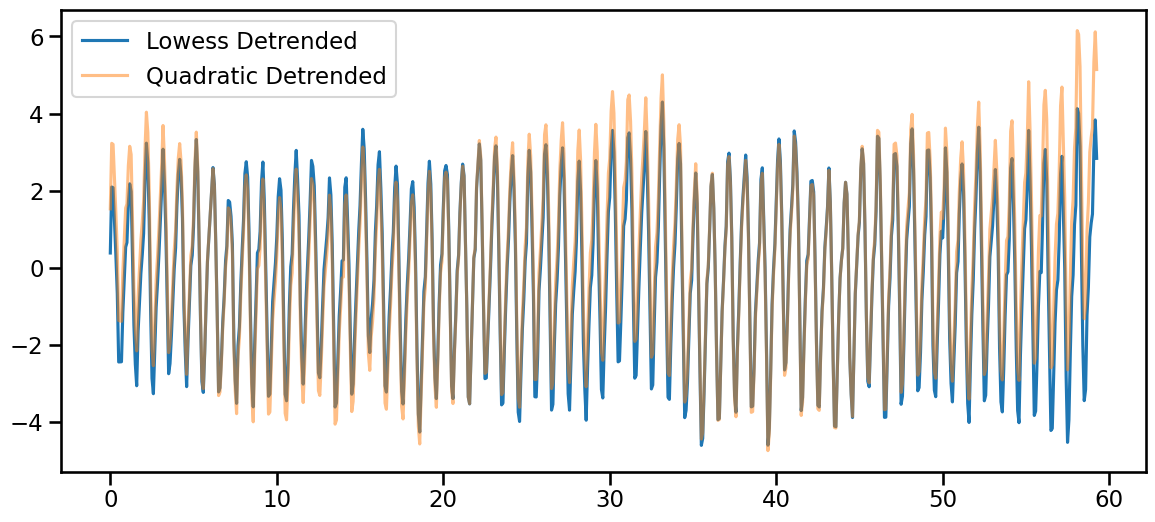

In [20]:
# Detrend the data with statsmodels
import statsmodels.api as sm

# Compute a lowess smoothing of the data
smoothed = sm.nonparametric.lowess(exog=all_times, endog=all_co2, frac=0.2)

fig = plt.figure(figsize=(14,6))
plt.plot(early_times, early_co2, label='training')
plt.plot(late_times, late_co2, label='testing')
plt.plot(smoothed[:,0], smoothed[:,1])
plt.legend()
plt.ylabel('CO2 [ppm]')
plt.xlabel('time point')
plt.title('Keeling Curve')
plt.grid(alpha=0.2)


# See how well the lowess smoothing did
all_co2_smoothed = smoothed[:,1]
all_co2_detrended = all_co2 - all_co2_smoothed

fig = plt.figure(figsize=(14,6))
plt.plot(all_times, all_co2_detrended, label='Lowess Detrended')
plt.plot(all_times, all_co2_stationary, label='Quadratic Detrended', alpha=0.5)
plt.legend()




Save your detrended data in arrays - both of them (or more if you try more than two detrending steps). You will need them: the code below just uses one (polynomial detrending). 

An important option is _no detrending_: what does deep learning do if you don't detrend? Does it hurt? This case trivially gives you a third case to try. 

&#9989; **Task:** Discuss what you learned from these detrending approaches here:

**We can see that the Lowess detrending works better than the simple polynomial detrending since our residual is more sinusodial. Yet, here the Lowess detrending is not one that is trained on the data, so it might not be the best detrending method for certain data sets since the curve_fit method is trained on the data and might be more robust to outliers.**

---
# Part 3: LSTMs

![ts_pic](http://dprogrammer.org/wp-content/uploads/2019/04/RNN-vs-LSTM-vs-GRU-1200x361.png)
____

With our data detrended, let's turn to deep learning and Tensorflow. 

Discuss the code below within your group.

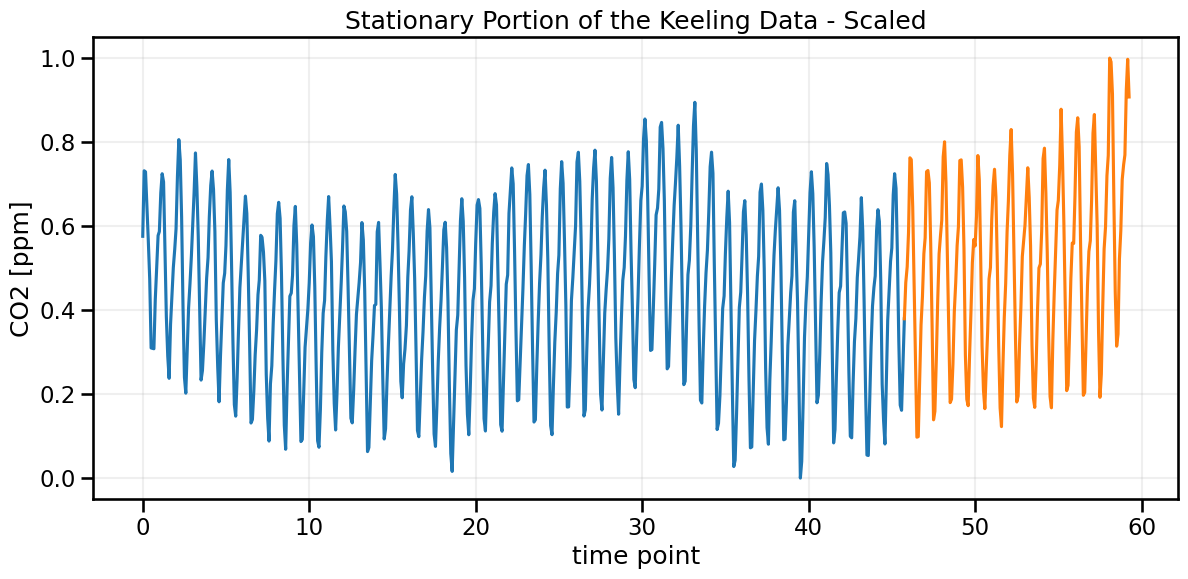

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
	
# scale the dataset
MM_scaler = MinMaxScaler(feature_range=(0, 1))
all_co2_scaled = MM_scaler.fit_transform(all_co2_stationary.reshape(-1,1))
early_co2_scaled = all_co2_scaled[:len(early_co2_stationary)]
late_co2_scaled = all_co2_scaled[len(early_co2_stationary):]

# plot your new data to see that the scaling worked
fig = plt.figure(figsize=(14,6))
plt.title('Stationary Portion of the Keeling Data - Scaled')
plt.ylabel('CO2 [ppm]')
plt.xlabel('time point')
plt.grid(alpha=0.2)
plt.plot(early_times, early_co2_scaled)
plt.plot(late_times,  late_co2_scaled)

&#9989; **Task:** Give a summary of what the above code does. 
* What are the different `keras` libraries for? 
* Why is `reshape` needed in scaler? 

**The code above is used to scale the data to force its min to be 0 an max to be 1**
1. **The different keras libraries are used to import the different layers that we will use to build our LSTM model**
2. **The reshape is needed in scaler to make sure that the data is forced into a shape of (data,1) for it to work**

&#9989; **Task:** Watch the video below

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("YCzL96nL7j0",width=640,height=360)

&#9989; **Question:** What problem does LSTMs solve?

**LSTMs solve the problem of exploding/vanishing gradients**

## Transforming Data: More!

So far the data transformations have been pretty obvious from the point of view of TSA and what we might expect for a DNN. Now we need to get to the nitty-gritty of how to prepare data _specifically for LSTMs_.

There are many reasons that LSTMs are a bit more complicated to set up:
* LSTMs can be used for many things, including regression and classification.
* The nature of the training interval can vary.
* It is possible to do multivariate LSTMs: suppose for this project we wanted to predict CO$_2$ levels, _but we also had temperature data_. 
* There are a lot of options within each LSTM unit (e.g., different activation functions). 

As with many other ML libraries we have seen, a lot of assumptions on the form of the input data are made and it can seem awkward for simple cases like we have here. 



With all of that said, here is how we will use an LSTM today: we will forecast in a very specific way, which is to give a number of previous values and ask for the next value.

Walk through this code very slowly and discuss it. There are many ways to do this, and this is obviously just one of them. 

In [34]:
# This function reads in the dataset and breaks it into two parts, one
# is used as the input and one for the output. The input contains the several 
# "past" points and the output is the known "next" point - this is 
# supervised learning in time. 
def create_dataset(dataset, past_steps=1):

	# make some empty lists to fill
	dataX, dataY = [], []

	for i in range(len(dataset)-past_steps-1):
		a = dataset[i:(i + past_steps), 0]
		dataX.append(a)
		dataY.append(dataset[i + past_steps, 0])
	
	return np.array(dataX), np.array(dataY)
 
 
# Put data into a form for training. Here, X is the "features" and Y is 
# the "labels". The number of features for a given label is the number 
# of past steps, and there is always one label (the next value in the series).
# You will vary the number of past steps.
past_steps = 1
trainX, trainY = create_dataset(early_co2_scaled, past_steps)
testX, testY = create_dataset(late_co2_scaled, past_steps)

# LSTMs have 3D inputs, so let's put it into the desired form.	
# Reshape input to be: [samples, time steps, features].
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

&#9989; **Task:** A lot happened in that code from the perspective of both what the LSTM requires as input, but also what the logic is of how we are doing the forecasting. Stop and pause to discuss this with your group. Play with these print statement to be sure you understand what is being done. 

In [35]:
print("The shape of the training data is:\n", trainX.shape)
print("\nThe shape of the testing data is:\n", testX.shape)
print("\nTraining data looks like this:\n", trainX[:5])
print("\nTraining labels look like this:\n", trainY[:5])

The shape of the training data is:
 (543, 1, 1)

The shape of the testing data is:
 (161, 1, 1)

Training data looks like this:
 [[[0.57570936]]

 [[0.7317051 ]]

 [[0.72914212]]

 [[0.56593014]]

 [[0.47410298]]]

Training labels look like this:
 [0.7317051  0.72914212 0.56593014 0.47410298 0.30976701]


# Part 4: Training and Fitting the LSTM

Finally (!) we are in a position to train our LSTM. 


![pen](https://findicons.com/files/icons/766/base_software/128/pencil3.png)


Discuss within your group what each of the lines below do, and give a summary of each of these in a markdown cell:
* What is `Sequential`?
* What does `input_shape` do and what are its parameters? How does the LSTM know how you have organized your data? 
* What does `.add` do, and what sorts of arguments does it take? 
* What is `Dense(1)` do? 
* Why do we need a `compile` step? 
* What are the inputs to `.fit` and are they reasonable? What would you change? 
* what is an "epoch"? 

1. Sequential is a keras model that is used to build a model layer by layer
2. input_shape tells the model what the shape of the input data is
3. .add adds a layer to the model
4. Dense(1) is a layer that is one neuron
5. We need a compile step to compile the model and make it ready for training
6. The inputs to .fit are the training data and the labels. I would change the batch size and the number epochs to be higher
7. An epoch is one iteration over the entire input data

In [36]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, past_steps)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=25, batch_size=8, verbose=2)

Epoch 1/25
68/68 - 4s - loss: 0.2035 - 4s/epoch - 60ms/step
Epoch 2/25
68/68 - 0s - loss: 0.1094 - 235ms/epoch - 3ms/step
Epoch 3/25
68/68 - 0s - loss: 0.0561 - 287ms/epoch - 4ms/step
Epoch 4/25
68/68 - 0s - loss: 0.0335 - 263ms/epoch - 4ms/step
Epoch 5/25
68/68 - 0s - loss: 0.0270 - 236ms/epoch - 3ms/step
Epoch 6/25
68/68 - 0s - loss: 0.0251 - 261ms/epoch - 4ms/step
Epoch 7/25
68/68 - 0s - loss: 0.0239 - 309ms/epoch - 5ms/step
Epoch 8/25
68/68 - 0s - loss: 0.0227 - 250ms/epoch - 4ms/step
Epoch 9/25
68/68 - 0s - loss: 0.0216 - 213ms/epoch - 3ms/step
Epoch 10/25
68/68 - 0s - loss: 0.0205 - 244ms/epoch - 4ms/step
Epoch 11/25
68/68 - 0s - loss: 0.0194 - 292ms/epoch - 4ms/step
Epoch 12/25
68/68 - 0s - loss: 0.0183 - 227ms/epoch - 3ms/step
Epoch 13/25
68/68 - 0s - loss: 0.0174 - 223ms/epoch - 3ms/step
Epoch 14/25
68/68 - 0s - loss: 0.0164 - 212ms/epoch - 3ms/step
Epoch 15/25
68/68 - 0s - loss: 0.0156 - 213ms/epoch - 3ms/step
Epoch 16/25
68/68 - 0s - loss: 0.0149 - 258ms/epoch - 4ms/step
Epo

In [37]:
# Now that the LSTM is trained, make predictions using both training 
# and testing data.
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = MM_scaler.inverse_transform(trainPredict)
trainY = MM_scaler.inverse_transform([trainY])
testPredict = MM_scaler.inverse_transform(testPredict)
testY = MM_scaler.inverse_transform([testY])

# calculate RMSE
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

6/6 [==============================] - 0s 3ms/step
Train Score: 1.18 RMSE
Test Score: 1.31 RMSE


While those RMSE values quantitatively tell us how well we did, let's make some plots to show to our senator. The tricky part is shifting the predictions to be in register with the original data. (As usual, with the powerful Python libraries, we spend most of our time preparing the data to go in and then to visualize results afterwards!) 

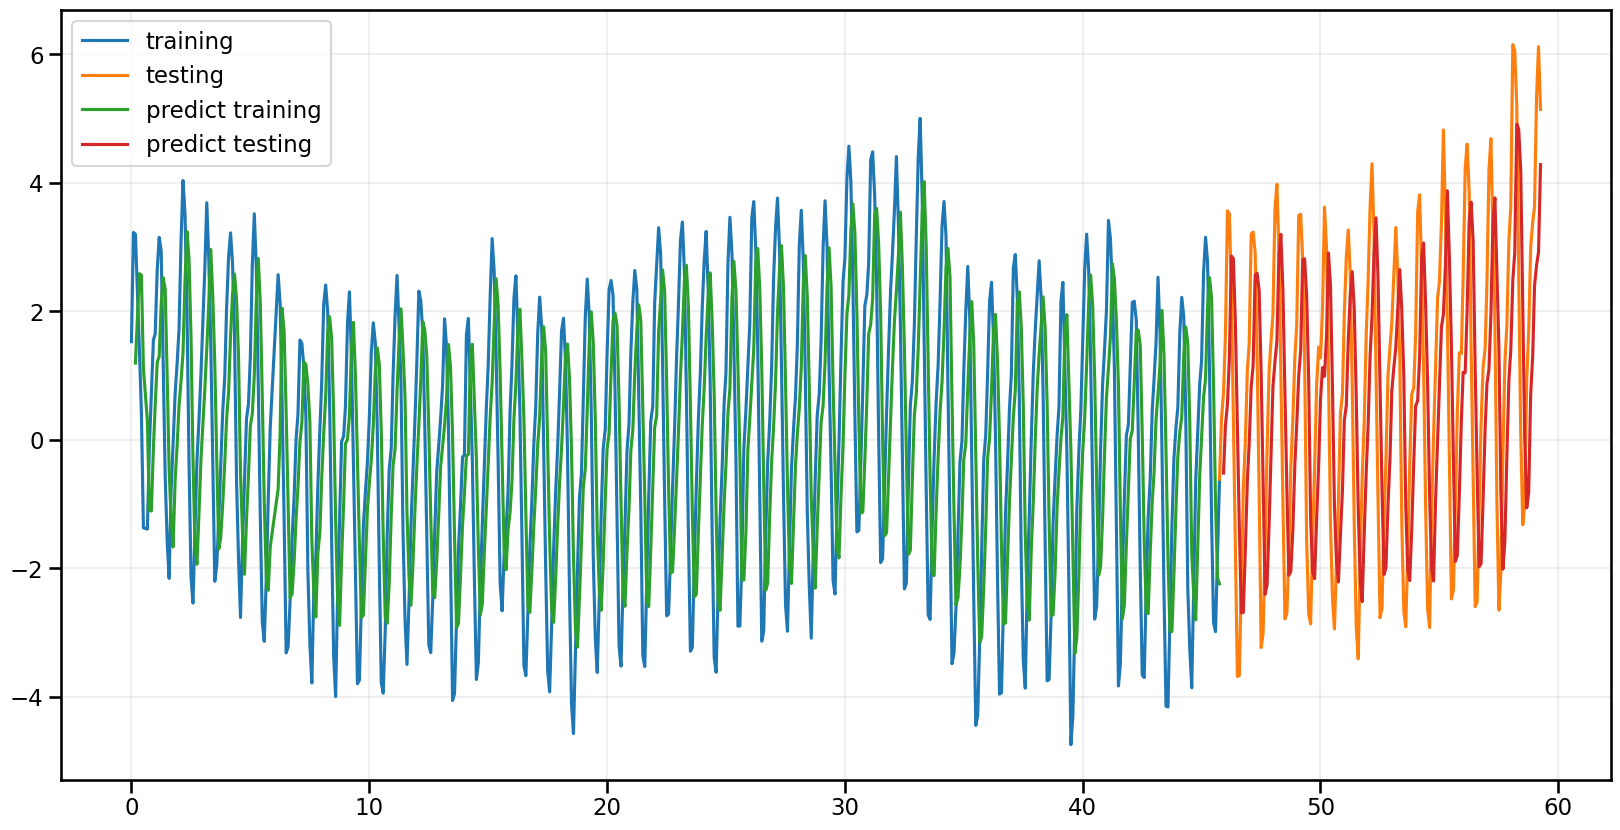

In [38]:
fig = plt.figure(figsize=(20,10))

# original test and train data
# plt.plot(all_times, MM_scaler.inverse_transform(all_co2_scaled), linewidth=5, alpha = 0.2)
plt.plot(early_times, MM_scaler.inverse_transform(early_co2_scaled), label='training')
plt.plot(late_times, MM_scaler.inverse_transform(late_co2_scaled), label='testing')

# plt.plot(early_times, trainPredict)
plt.plot(early_times[past_steps+1:], trainPredict[:,0], label='predict training')
plt.plot(late_times[past_steps+1:], testPredict[:,0], label='predict testing')
plt.legend()
plt.grid(alpha = 0.2)

&#9989; **Task:** Make another plot that adds the trend back in:
* Plot the original data (copy some of the code from the very top of this notebook). 
* Using the `curve_fit` you did above add the trend to the predicted values of the testing data to get the full prediction (not just the stationary part). 

How well does the LSTM predict the full trend of the CO$_2$ levels?

Vary the number of epochs in the LSTM *and* the number of past point used. How do these changes the loss function value and the general visual quality (the "eye norm")? 

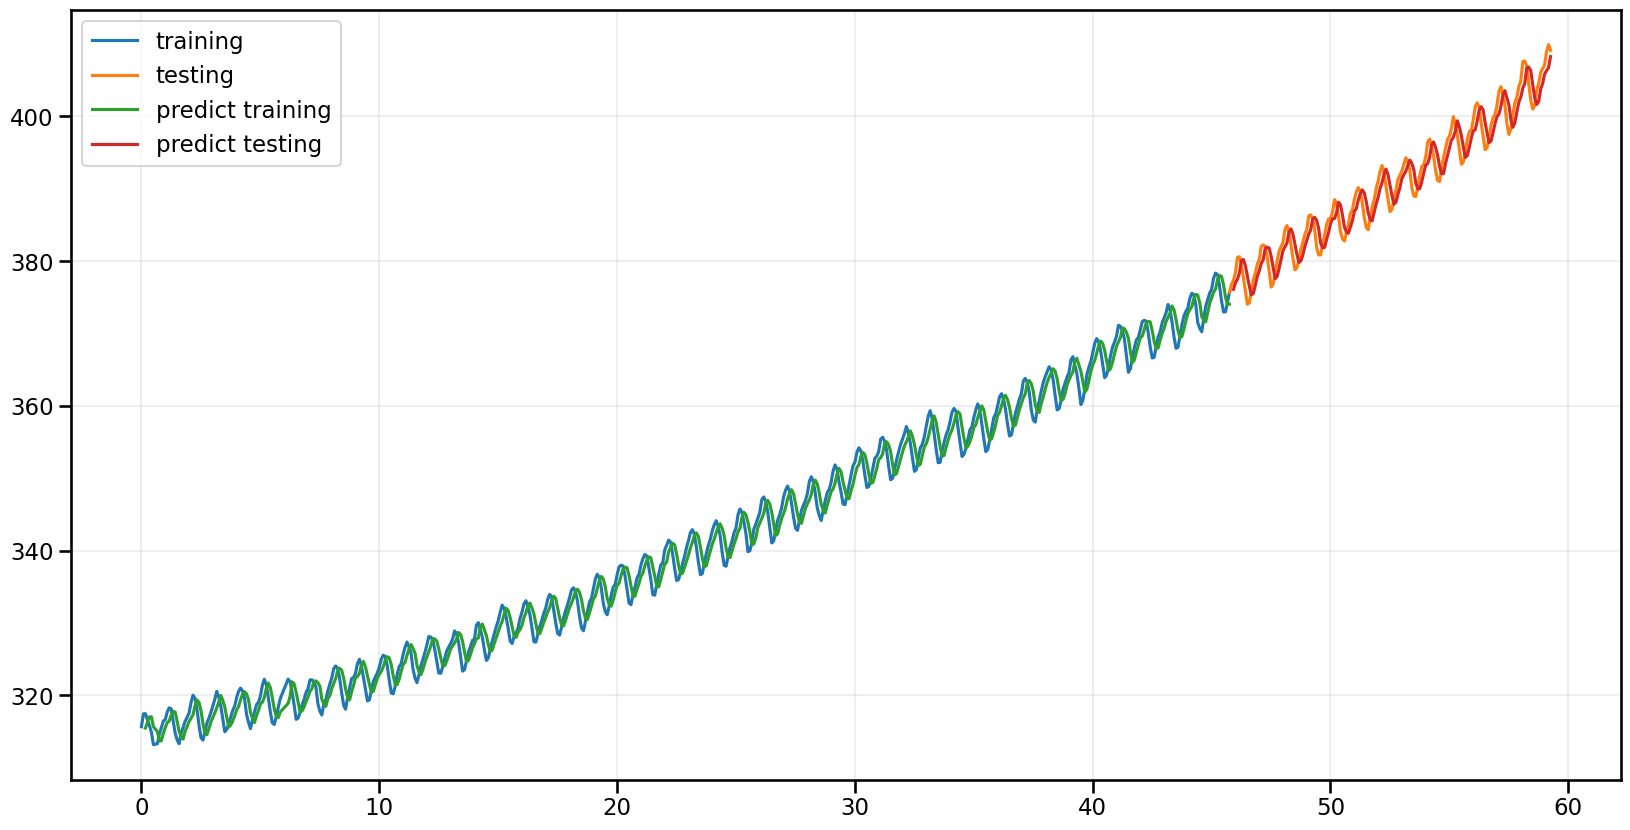

In [45]:
# Put your code here


fig = plt.figure(figsize=(20,10))

# trended test and train data
plt.plot(early_times, MM_scaler.inverse_transform(early_co2_scaled)[:,0]+ trend_season(early_times, *popt), label='training')
plt.plot(late_times, MM_scaler.inverse_transform(late_co2_scaled)[:,0]+ trend_season(late_times, *popt), label='testing')

# trended predicted data
plt.plot(early_times[past_steps+1:], trainPredict[:,0]+ trend_season(early_times[past_steps+1:], *popt), label='predict training')
plt.plot(late_times[past_steps+1:], testPredict[:,0]+ trend_season(late_times[past_steps+1:], *popt), label='predict testing')
plt.legend()
plt.grid(alpha = 0.2)

&#9989; **Task:** Finally, *discuss* within your group how confident you are in your forecast. Global climate change is a topic that garners a lot of attention from people with quite disparate points of view. 
* Are you convinced of your prediction for the CO$_2$ levels, and do you think you could convince other people? Or, was this IC too simplistic and, if so, how
* Does ML add any value to these predictions? 
* *Write* a short summary of what each of your group members thinks about the quality of your forecast. 

1. This results is most definitely useful, but I would not be extremely confident in it. If my argument was that we need to lower C02 levels, I would not be confident that this model would even show lowering C02 levels from the quadratic trend. 
2. I think that ML does add value to these predictions since it can help us see trends that we might not have seen before.

&#9989; **Task:** There is one final issue to discuss. Think about what was done here in terms of making a forecast: we showed that the LSTM is able to take some number of past samples and predict the next one. Great! That is nice, but not useful if we want to forecast _past the final data point_. There are a couple of ways we could approach this:
* A standard method, which you could do with this notebook (but I am trying to keep these to a reasonable length) is to use the training data to predict the next point; then, take the old data with this new point as the new dataset and repeat to generate as many future points as you need. Because this automatically generates new data to use for regression, they are generically referred to as "autoregression models". Here, ML attempts to add value in the way we use past data to predict future points, but the autoregressive idea is the same as with older methods. 
* A much more expensive approach is to use the LSTM in another model, which is [_many-to-many_](https://keras.io/examples/lstm_seq2seq/): take portions of the training and predict the _entire_ future at once.

For problems like global climate change, there is an unfathomable cost associated with making the right decisions. Summarize an approach to forecasting CO$_2$ levels that you would trust.

**I would trust a more auto-regressive model since as I stated above our goal is to encourage the public/agencies to stop this trend. This should have a large impact on our future modeling and therefore predicting the entire future might not be accurate at all. On the otherhand this method is not useless at all as it can show results if we do not change the trend**

---


## Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-class assignments" folder, find the appropriate submission folder, and upload it there. Make sure to upload your plot images as well!

If the rest of your group is still working, help them out and show them some of the things you learned!

See you next class!

&#169; Copyright 2023,  The Department of Computational Mathematics, Science and Engineering at Michigan State University